<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-(bottom-up-method)" data-toc-modified-id="Introduction-(bottom-up-method)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction (bottom up method)</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparention" data-toc-modified-id="Data-directory-preparention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparention</a></span></li><li><span><a href="#Data-file-preparation" data-toc-modified-id="Data-file-preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preparation</a></span><ul class="toc-item"><li><span><a href="#input-directory-(all-general-raw-data-files)" data-toc-modified-id="input-directory-(all-general-raw-data-files)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>input</code> directory (all general raw data files)</a></span></li><li><span><a href="#input/Bottom_up_method-directory-(all-necessary-raw-data-files-for-the-bottom-up-method)" data-toc-modified-id="input/Bottom_up_method-directory-(all-necessary-raw-data-files-for-the-bottom-up-method)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>input/Bottom_up_method</code> directory (all necessary raw data files for the bottom up method)</a></span></li></ul></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Emission-factor-calculation-method" data-toc-modified-id="Emission-factor-calculation-method-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Emission factor calculation method</a></span><ul class="toc-item"><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data preperation</a></span></li><li><span><a href="#Emission-factor-per-power-plants" data-toc-modified-id="Emission-factor-per-power-plants-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Emission factor per power plants</a></span><ul class="toc-item"><li><span><a href="#Validation-of-emission-factor-per-power-plant" data-toc-modified-id="Validation-of-emission-factor-per-power-plant-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Validation of emission factor per power plant</a></span></li></ul></li><li><span><a href="#Emission-factor-per-technology-and-country" data-toc-modified-id="Emission-factor-per-technology-and-country-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Emission factor per technology and country</a></span></li><li><span><a href="#Emission-factor-per-country" data-toc-modified-id="Emission-factor-per-country-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Emission factor per country</a></span></li></ul></li><li><span><a href="#Validation-of-calculated-emission-factors" data-toc-modified-id="Validation-of-calculated-emission-factors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Validation of calculated emission factors</a></span><ul class="toc-item"><li><span><a href="#Validation-threshold-for-EF-per-technology-and-country" data-toc-modified-id="Validation-threshold-for-EF-per-technology-and-country-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Validation threshold for EF per technology and country</a></span></li></ul></li><li><span><a href="#Export-final-EF-to-csv" data-toc-modified-id="Export-final-EF-to-csv-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Export final EF to csv</a></span></li></ul></div>

# Introduction (bottom up method)

In this script, we determine country specific emission factors (EF) for different generation technologies. The calculated EF per technology is based on an bottom up method, that uses the hourly power plant generation and yearly published emission data on power plant level.

The used method follows the idea to calculated a EF for individual power plants. In a late step the country specific EF per technology is determined by taking the mean EF from a representative sample of power plant-specific EFs in the resektive country.

The method was applied for data from 2018.

# Script setup

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter 

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]

#helpers
from helpers import load_timeseries_ENTSOE

# Data directory preparention

Create input, processed and output folders if they don't exist
If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
Bootom_up_methode_input_directory_path = os.path.join('input', 'Bootom_up_methode')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(Bootom_up_methode_input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preparation

## `input` directory (all general raw data files)

- 1) ENTSO-E production per type
Production per type from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Production Type Available online: 
https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show
Processed with the following script that converts the data to hourly resolution (private script from INATECH):

 File - > time_series_60min_multiindex.csv -> generation per technology
 
- 2) ENTSO-E production per unit
Production per Unit from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Generation Unit Available online: https://transparency.entsoe.eu/generation/r2/actualGenerationPerGenerationUnit/show (accessed on Apr 29, 2020).
Processed with the following script that converts the data to hourly resolution (private script from INATECH):
https://github.com/INATECH-CIG/entso-e_GenerationOutputPerUnit

File - > gen_data.csv -> hourly generation data per unit

File - > unit_data.csv -> information about the generation units



In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(input_directory_path, fn) for fn in os.listdir(input_directory_path)]

print(filenames)

['input\\Bootom_up_methode', 'input\\CO2_Signal', 'input\\ember_EF.csv', 'input\\entso.csv', 'input\\entsoe-statistical-factsheet-2018-stacked.csv', 'input\\entsoe_gen_type_hourly_table.csv', 'input\\entsoe_gen_type_hourly_table1.csv', 'input\\entso_gen_type_hourly_table_scaled.csv', 'input\\entso_scaled.csv', 'input\\gen_data_2015.csv', 'input\\gen_data_2016.csv', 'input\\gen_data_2017.csv', 'input\\gen_data_2018.csv', 'input\\Matching', 'input\\MDV_table.csv', 'input\\time_series_60min_multiindex.csv', 'input\\top_down_methode', 'input\\unit_data_2015.csv', 'input\\unit_data_2016.csv', 'input\\unit_data_2017.csv', 'input\\unit_data_2018.csv']


## `input/Bottom_up_method` directory (all necessary raw data files for the bottom up method)

Based on the developed method the following data sets needed:

- 1) Matcher for power plants in ENTSO-E and EUTL Data for Europe
The matching was performed by a manual process (see description).

File - > Matching_Entso_EUTL_EU.csv

- 2) EU Emissions Data (EUTL)
Data are provided in the report section of the following web side:
https://ec.europa.eu/clima/policies/ets/registry_en#tab-0-1

For example: ->Documentation->Reports->Verified Emissions for 2019

File - > "Verified Emissions for 2019" -> verified_emissions_2018_en.xlsx -> converted to .csv

Another way to check the data is directly through the European Union Transaction Log:
https://ec.europa.eu/clima/ets/napMgt.do?languageCode=en

In [4]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(Bootom_up_methode_input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(Bootom_up_methode_input_directory_path, fn) for fn in os.listdir(Bootom_up_methode_input_directory_path)]

print(filenames)

['input\\Bootom_up_methode\\matching_ENTSOE_EU_ETS.csv', 'input\\Bootom_up_methode\\old', 'input\\Bootom_up_methode\\verified_emissions_2018_en.csv', 'input\\Bootom_up_methode\\verified_emissions_2018_en.xlsx', 'input\\Bootom_up_methode\\~$verified_emissions_2018_en.xlsx']


# Load data functions

In [5]:
def change_ENTSOE_ProductionTypeName (ProductionTypeName):
    """
    Converts ENTSO-E ProductionTypeNames into INATECH technology type names.

    Parameters
    ----------
    ProductionTypeName : string
        DESCRIPTION.

    Returns
    -------
    string
        DESCRIPTION.

    """
    return ProductionTypeName.replace({
            'Fossil Hard coal': 'hard_coal', 
            'Fossil Brown coal/Lignite': 'lignite', 
            'Fossil Gas': 'gas',
            'Fossil Coal-derived gas': 'other_fossil',
            'Fossil Peat': 'other_fossil',
            'Nuclear': 'nuclear',
            'Biomass': 'biomass',
            'Waste': 'waste',
            'Geothermal': 'other_renewable',
            'Marine': 'other_renewable',
            'Other': 'other_fossil',
            'Hydro Pumped Storage': 'hydro',
            'Hydro Run-of-river and poundage': 'hydro',
            'Hydro Water Reservoir': 'hydro',
            'Fossil Oil': 'other_fossil',
            'Fossil Oil shale': 'other_fossil', 
            'Solar': 'solar',
            'Wind Onshore': 'wind_onshore',
            'Wind Offshore': 'wind_offshore',
            'Other renewable': 'other_renewable'}, inplace = False)

In [6]:
def load_matching_data_EU(path, fn):
    """
    Load the matching list for EU power plants with ENTSO-E identifier and the EUTL identifier.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn), sep = ',', header = 0, index_col=0)

    return df

def load_EUTL_data(path, fn):
    """
    Load the EU emission data (EUTL).
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ';', header = 13, encoding='ISO-8859-1')

    return df

def load_generation_per_unit(path, fn):
    """
    Load the ENTSO-E gernation per unit data.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    generation = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0,parse_dates=True)
    
    return generation

def load_unit_info(path, fn):
    """
    Load the ENTSO-E generation unit information.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0)
    
    # Rename production type name according to own convention
    df.ProductionTypeName = change_ENTSOE_ProductionTypeName(df.ProductionTypeName)
    
    # set name for the index
    df.index.set_names('GenerationUnitEIC', inplace=True)

    return df

# Load data sets

#### Load power plant generation data

In [7]:
generation_per_unit_2018 = load_generation_per_unit(input_directory_path, 'gen_data_2018.csv')

#### Load power plant unit inforamtion (capacity, name, etc.)

In [8]:
generation_unit_info = load_unit_info(input_directory_path, 'unit_data_2018.csv')

#### Load CO2_emissions data from EUTL dataset

In [9]:
EUTL_emissions = load_EUTL_data(Bootom_up_methode_input_directory_path, 'verified_emissions_2018_en.csv')

#### Load machting information for power plant data

In [10]:
unit_matching_EU = load_matching_data_EU(Bootom_up_methode_input_directory_path, 'matching_ENTSOE_EU_ETS.csv')

# Emission factor calculation method

In the following the EF calculation is down step by step

## Data preperation

#### Yearly power generation per unit

Store the yearly generation per power plant to the power plant information data set.

In [11]:
generation_unit_info['generation_2018'] = generation_per_unit_2018.sum()

#### Matching ENTSO-E ID and EUTL ID

Combining matching information (ENTSO-E ID and EUTL ID) to the generation unit info. Keep only matched information.

In [12]:
generation_unit_info_matched = pd.merge(generation_unit_info, unit_matching_EU, left_on='GenerationUnitEIC', right_on='eic_g', how='inner')

In [13]:
generation_unit_info_matched.ProductionTypeName.unique()

array(['gas', 'hard_coal', 'biomass', 'lignite', 'other_fossil'],
      dtype=object)

#### Connecting emissions and production data

Create a unique identifier from the country code and the plant ID in the emission data set and generation unit data set.

In [14]:
generation_unit_info_matched['Unique_ID'] = generation_unit_info_matched.EUTL_countrycode + generation_unit_info_matched.EUTL_ID.astype(str)
EUTL_emissions['Unique_ID'] = EUTL_emissions.REGISTRY_CODE + EUTL_emissions.INSTALLATION_IDENTIFIER.astype(int).astype(str)

#### Merge both datasets 

In [15]:
generation_unit_info_matched = generation_unit_info_matched.merge(EUTL_emissions, left_on='Unique_ID', right_on='Unique_ID', how='inner')

In [16]:
generation_unit_info_matched.set_index('eic_g', inplace=True)

Show first 10 entries from data

In [17]:
generation_unit_info_matched.head(5)

,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionTypeName,ProductionUnitEIC,duplicate_count,generation_2018,...,VERIFIED_EMISSIONS_2012,ALLOCATION_2011,VERIFIED_EMISSIONS_2011,ALLOCATION_2010,VERIFIED_EMISSIONS_2010,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE
eic_g,,,,,,,,,,,,,,,,,,,,,
14W-GEN-LAU----Z,10YAT-APG------L,APG CA,CTA,140.0,AT,Lau GuD,gas,14W-PROD-LAU---8,2.0,0.00,...,95890,304721,109080,304721,206265,304721,118982,304721,256284,OPEN
14WENERGIEAGWT4S,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,gas,14WENERGIE--WT02,2.0,685235.67,...,188992,681283,560205,681283,580029,681283,340026,218704,103553,OPEN
14W-KW-DUE-EVN-A,10YAT-APG------L,APG CA,CTA,332.0,AT,KW Dürnrohr Block 2,hard_coal,14W-KW-DU2-EVN-K,2.0,745290.41,...,1195366,1139438,1611109,1139438,1592747,1139438,899251,1139438,1435406,OPEN
14WENERGIEAGWR21,10YAT-APG------L,APG CA,CTA,150.0,AT,KW Riedersbach 2 G2,hard_coal,14WENERGIEAGWR05,2.0,0.00,...,208067,437140,253226,437140,310019,437140,342118,437140,730397,OPEN
45W000000000029I,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Avedoerevaerket 1,biomass,45V0000000000091,1.0,646873.95,...,1007432,1763671,1543126,1763671,1625381,1763671,1772512,1763673,1890106,OPEN


In [18]:
generation_unit_info_matched.columns

Index(['AreaCode', 'AreaName', 'AreaTypeCode', 'InstalledGenCapacity',
       'MapCode', 'PowerSystemResourceName', 'ProductionTypeName',
       'ProductionUnitEIC', 'duplicate_count', 'generation_2018', 'eic_p',
       'EUTL_countrycode', 'EUTL_ID', 'Unique_ID', 'REGISTRY_CODE',
       'IDENTIFIER_IN_REG', 'INSTALLATION_NAME', 'INSTALLATION_IDENTIFIER',
       'PERMIT_IDENTIFIER', 'MAIN_ACTIVITY_TYPE_CODE', 'ALLOCATION_2018',
       'ALLOCATION_RESERVE_2018', 'ALLOCATION_TRANSITIONAL_2018',
       'VERIFIED_EMISSIONS_2018', 'ALLOCATION_2017', 'ALLOCATION_RESERVE_2017',
       'ALLOCATION_TRANSITIONAL_2017', 'VERIFIED_EMISSIONS_2017',
       'ALLOCATION_2016', 'ALLOCATION_RESERVE_2016',
       'ALLOCATION_TRANSITIONAL_2016', 'VERIFIED_EMISSIONS_2016',
       'ALLOCATION_2015', 'ALLOCATION_RESERVE_2015',
       'ALLOCATION_TRANSITIONAL_2015', 'VERIFIED_EMISSIONS_2015',
       'ALLOCATION_2014', 'ALLOCATION_RESERVE_2014',
       'ALLOCATION_TRANSITIONAL_2014', 'VERIFIED_EMISSIONS_2014',


## Emission factor per power plants

The following function calculates the EF for each entry in the EUTL data set. Due to the fact, that the EUTL data set has a spatial resolution on site level and not on power plant level it can happen, that power plants data need to be aggregated together in the emission calculation.


In [19]:
def calc_side_gen(df, year):
    # calculate the electricity generation per side.
    side_generation = df.groupby(['EUTL_countrycode','EUTL_ID']).sum()['generation_' + str(year)].reset_index()
    
    # add side generation to PP dataset
    df['side_generation_' + str(year)] = df.apply(lambda x: side_generation.query('EUTL_countrycode == @x.EUTL_countrycode')\
                                                              .query('EUTL_ID == @x.EUTL_ID').iloc[0,2],axis = 1)
    
    return df

In [20]:
years = [2018]

for i in years:
    generation_unit_info_matched = calc_side_gen(generation_unit_info_matched, i)

Distribute the reported emissions per site across the individual power plants in relation to the reported generation per unit at one side.

In [21]:
for i in years:
    generation_unit_info_matched['ALLOCATION_' + str(i)] = generation_unit_info_matched['ALLOCATION_' + str(i)].apply(str)
    generation_unit_info_matched['ALLOCATION_' + str(i)].replace({'Excluded' : 0}, inplace = True)
    generation_unit_info_matched['ALLOCATION_' + str(i)].replace({'-1' : 0}, inplace = True)
    generation_unit_info_matched['ALLOCATION_' + str(i)] = generation_unit_info_matched['ALLOCATION_' + str(i)].apply(float)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].apply(str)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].replace({'Excluded' : 0}, inplace = True)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].replace({'-1' : 0}, inplace = True)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].apply(float)
    



In [22]:
### Achtung hier ändere ich die Emissionen 
for i in years:
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] - ((generation_unit_info_matched['ALLOCATION_' + str(i)] / 50) * 100)

In [23]:
for i in years:
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].apply(str)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].replace({'Excluded' : 0}, inplace = True)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].apply(float)
    generation_unit_info_matched['PP_emissions_' + str(i)] = (generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] / generation_unit_info_matched['side_generation_' + str(i)]) * generation_unit_info_matched['generation_' + str(i)]    

Calculates the emission factor for each PP.

In [24]:
for i in years:
    generation_unit_info_matched['PP_EF' + str(i)] = generation_unit_info_matched['PP_emissions_' + str(i)] / generation_unit_info_matched['generation_' + str(i)]

Show first 10 entries from data.

Attention, the verified_emissions_* per power plant are always site-related (eic_p), if there are several power plants at one site, the emissions have to be distributed among the power plants. (see. PP_emissions)

In [25]:
generation_unit_info_matched.head()

,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionTypeName,ProductionUnitEIC,duplicate_count,generation_2018,...,ALLOCATION_2010,VERIFIED_EMISSIONS_2010,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018
eic_g,,,,,,,,,,,,,,,,,,,,,
14W-GEN-LAU----Z,10YAT-APG------L,APG CA,CTA,140.0,AT,Lau GuD,gas,14W-PROD-LAU---8,2.0,0.00,...,304721,206265,304721,118982,304721,256284,OPEN,0.00,NaN,NaN
14WENERGIEAGWT4S,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,gas,14WENERGIE--WT02,2.0,685235.67,...,681283,580029,681283,340026,218704,103553,OPEN,685235.67,254778.000000,0.371811
14W-KW-DUE-EVN-A,10YAT-APG------L,APG CA,CTA,332.0,AT,KW Dürnrohr Block 2,hard_coal,14W-KW-DU2-EVN-K,2.0,745290.41,...,1139438,1592747,1139438,899251,1139438,1435406,OPEN,745290.41,0.000000,0.000000
14WENERGIEAGWR21,10YAT-APG------L,APG CA,CTA,150.0,AT,KW Riedersbach 2 G2,hard_coal,14WENERGIEAGWR05,2.0,0.00,...,437140,310019,437140,342118,437140,730397,OPEN,0.00,NaN,NaN
45W000000000029I,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Avedoerevaerket 1,biomass,45V0000000000091,1.0,646873.95,...,1763671,1625381,1763671,1772512,1763673,1890106,OPEN,2025224.37,-143410.918928,-0.221698


### Validation of emission factor per power plant

Check and test results and drop all results that are not plausible.

Which technologies are covered in the data set?

In [26]:
generation_unit_info_matched.ProductionTypeName.unique()

array(['gas', 'hard_coal', 'biomass', 'lignite', 'other_fossil'],
      dtype=object)

Take only the following technologies:

In [27]:
tech = ['gas', 'hard_coal', 'lignite', 'other_fossil']

In [28]:
generation_unit_info_matched = generation_unit_info_matched.query('ProductionTypeName in @tech')

Since not all emission factors are correctly calculated we limited the list of calculated emissions per power plant is checked by a plausibility check. We are using numbers from the UBA and added a treshold of plus minus 50 %.

UBA:
https://www.umweltbundesamt.de/sites/default/files/medien/1410/publikationen/2020-04-01_climate-change_13-2020_strommix_2020_fin.pdf

Some comparison numbers:
https://www.gegenwind-saarland.de/Materialien/Energiewende/071031--VdI---CO2-Emissionen%20der%20Stromerzeugung_01.pdf

In [29]:
# emissions space per technology in [t CO2/MWh] 

emission_space = {"lignite": (1.635,0.545),
                  "hard_coal": (1.230,0.410),
                  "gas": (0.555,0.185),
                  "other_fossil": (2.250,0.750)}

In [30]:
# function for CI check
def check_CI (PP_EF, ProductionTypeName):
    if PP_EF > emission_space[ProductionTypeName][1] and PP_EF < emission_space[ProductionTypeName][0]:
        return True
    else:
        return False  

In [31]:
# us CI_check function for CI validation
for i in years:
    generation_unit_info_matched['EF_' + str(i) + '_validation'] = generation_unit_info_matched.apply(lambda x: check_CI(x['PP_EF' + str(i)], x['ProductionTypeName']), axis=1)

In [32]:
# take only the data that are validated
# for more years using -> & [(generation_unit_info_matched.EF_2016_validation == True) & (generation_unit_info_matched.EF_2018_validation == True)]
generation_unit_info_validated = generation_unit_info_matched[(generation_unit_info_matched.EF_2018_validation == True)]

In [33]:
len(generation_unit_info_matched)

840

In [34]:
#number of power plants
len(generation_unit_info_validated)

543

In [35]:
# total generation of validated power plants
generation_unit_info_validated.generation_2018.sum()

679453259.1274993

reasons why the CI is not valid:

1.) Match is not correct - then one more iteration is necessary

2.) Data is wrong or incomplete

3.) Match is correct, but it's a highly aggregated facility such like a steel manufacturing factory, where both process-CO2 AND the emissions from the power plant running the process accounts into the number given in the dataset.

4.) the facility contains more smaller power plants which are not covered by ENTSO-E (<100MW) but nevertheless
produce emissions which need to be paid for.

5.) if the number of the carbon-intensity is negative, then the dataset is explained as " -1 = blank (No allocation has been made / No Emissions have been Verified)"

#### Plot EF per technology

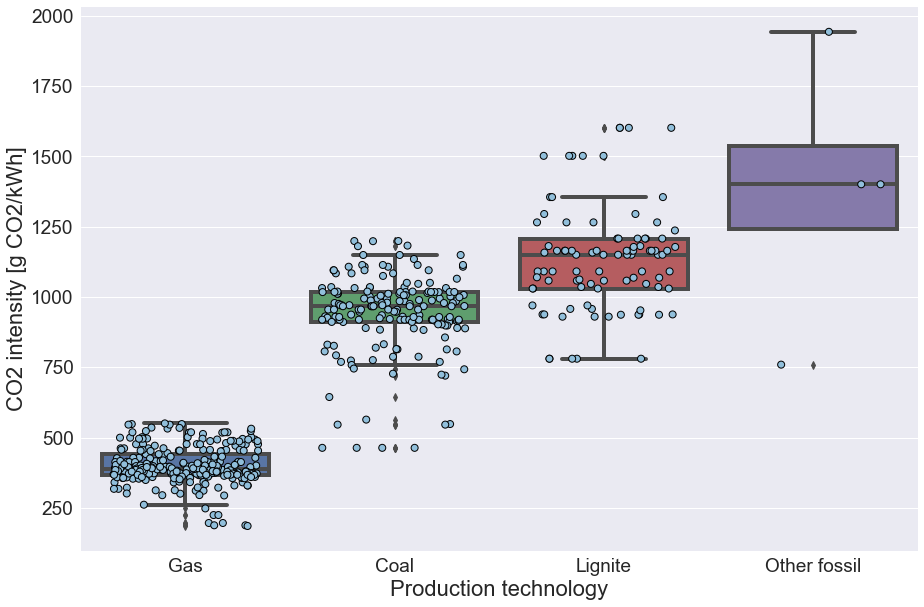

In [36]:
generation_unit_info_validated_plot = generation_unit_info_validated[['ProductionTypeName','PP_EF2018','EUTL_countrycode']].copy()



# convert to g CO2 / kWh
generation_unit_info_validated_plot.PP_EF2018 = generation_unit_info_validated_plot.PP_EF2018 * 1000

fig, ax = plt.subplots(1, 1)

ax = sns.boxplot(x="ProductionTypeName", y="PP_EF2018", data=generation_unit_info_validated_plot, orient="v", linewidth=4, dodge=True)

ax = sns.stripplot(x="ProductionTypeName", y="PP_EF2018", data=generation_unit_info_validated_plot, color=".25", orient="v", size=7, jitter=0.35, palette=['#91bfdb'],edgecolor='black',
                  linewidth=1, dodge=True)

ax.set_xlabel("Production technology", fontsize=22)
ax.set_ylabel("CO2 intensity [g CO2/kWh]" , fontsize=22)

ax.tick_params(axis='x',labelsize=19)
ax.tick_params(axis='y',labelsize=19)

labels = ['Gas','Coal','Lignite','Other fossil']

ax.set_xticklabels(labels)
pass

#### Save point

In [37]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_by_technology.png'))

In [38]:
generation_unit_info_validated.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

## Emission factor per technology and country

In the following section we calculate EF per technology and country.

In [39]:
generation_per_tech_country = generation_unit_info_validated.groupby(['EUTL_countrycode','ProductionTypeName']).sum()[['generation_2018','PP_emissions_2018']]

In [40]:
EF_per_tech_country = generation_per_tech_country.PP_emissions_2018 / generation_per_tech_country.generation_2018

#### Plot mean EF per technology and country

<Figure size 1080x720 with 0 Axes>

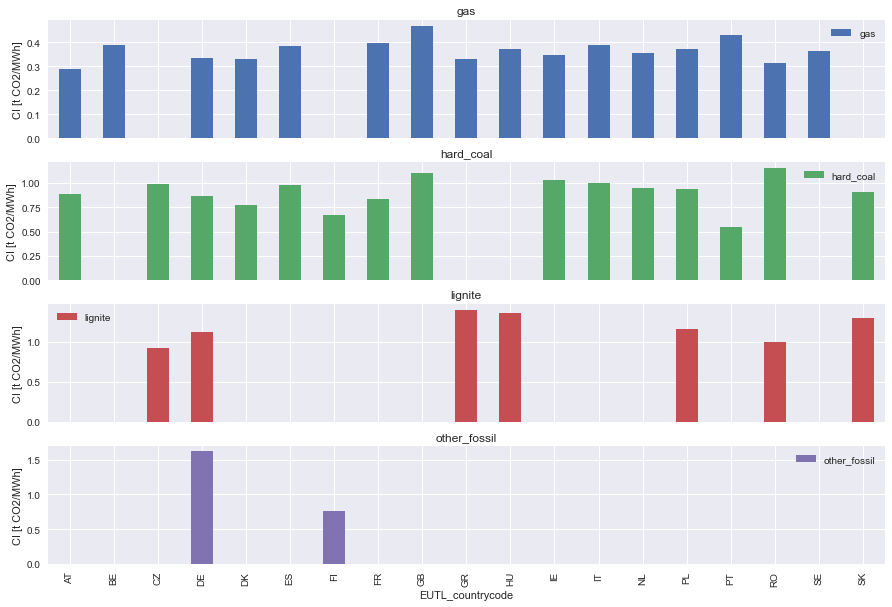

In [41]:
plt.figure()

EF_per_tech_country.unstack(level=1).plot(kind='bar', subplots=True, ylabel='CI [t CO2/MWh]')

plt.grid(True)

#### Emission factors per technologies and countries

In [42]:
EF_per_tech_country

EUTL_countrycode  ProductionTypeName
AT                gas                   0.288711
                  hard_coal             0.884070
BE                gas                   0.389641
CZ                hard_coal             0.985546
                  lignite               0.928296
DE                gas                   0.334091
                  hard_coal             0.871051
                  lignite               1.125560
                  other_fossil          1.619695
DK                gas                   0.329783
                  hard_coal             0.775840
ES                gas                   0.386506
                  hard_coal             0.975777
FI                hard_coal             0.674454
                  other_fossil          0.759814
FR                gas                   0.396985
                  hard_coal             0.834945
GB                gas                   0.467992
                  hard_coal             1.103223
GR                gas           

#### Add technology specific EF to the data set

In [43]:
# reset index
generation_unit_info_validated.reset_index(inplace=True)
# set new index for maping function 
generation_unit_info_EF_tech = generation_unit_info_validated.set_index(['EUTL_countrycode','ProductionTypeName'])

# map the EF to the data set
generation_unit_info_EF_tech['Tech_EF'] = generation_unit_info_EF_tech.index.map(EF_per_tech_country.to_dict())

#reset index
generation_unit_info_EF_tech.reset_index(inplace=True)

#set old index
generation_unit_info_EF_tech.set_index(['eic_g'],inplace=True)

In [44]:
generation_unit_info_EF_tech.head(5)

,EUTL_countrycode,ProductionTypeName,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionUnitEIC,duplicate_count,...,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018,EF_2018_validation,Tech_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,gas,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,14WENERGIE--WT02,2.0,...,681283,340026,218704,103553,OPEN,685235.67,254778.000000,0.371811,True,0.288711
45W000000000032T,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,147.0,DK,Asnaesvaerket 2,45V000000000011E,1.0,...,1765314,2430356,1765318,2484733,OPEN,770018.30,202216.305002,0.922057,True,0.775840
45W000000000033R,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,640.0,DK,Asnaesvaerket 5,45V000000000011E,1.0,...,1765314,2430356,1765318,2484733,OPEN,770018.30,507784.694998,0.922057,True,0.775840
45W000000000034P,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Amagervaerket 3,45V000000000012C,1.0,...,1250992,1684995,1250995,1089604,OPEN,1060165.23,771352.000000,0.727577,True,0.775840
45W000000000040U,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,377.0,DK,Esbjergvaerket 3,45V0000000000164,1.0,...,1051487,1318927,1051489,1158930,OPEN,1193633.83,924609.000000,0.774617,True,0.775840


#### Save point

In [45]:
generation_unit_info_EF_tech.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

## Emission factor per country

In the following section we calculate mean EF per country.

In [46]:
generation_per_country = generation_unit_info_validated.groupby(['EUTL_countrycode']).sum()[['generation_2018','PP_emissions_2018']]

In [47]:
EF_per_country = generation_per_country.PP_emissions_2018 / generation_per_country.generation_2018

In [48]:
# reset index
generation_unit_info_EF_tech.reset_index(inplace=True)
# set new index for maping function 
generation_unit_info_EF_country = generation_unit_info_EF_tech.set_index(['MapCode'])

# map the EF to the data set
generation_unit_info_EF_country['Country_EF'] = generation_unit_info_EF_country.index.map(EF_per_country.to_dict())

#reset index
generation_unit_info_EF_country.reset_index(inplace=True)

#set old index
generation_unit_info_EF_country.set_index(['eic_g'],inplace=True)

In [49]:
generation_unit_info_EF_country.head(5)

,MapCode,EUTL_countrycode,ProductionTypeName,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,PowerSystemResourceName,ProductionUnitEIC,duplicate_count,...,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018,EF_2018_validation,Tech_EF,Country_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,AT,gas,10YAT-APG------L,APG CA,CTA,400.0,Kraftwerk Timelkam GUD,14WENERGIE--WT02,2.0,...,340026,218704,103553,OPEN,685235.67,254778.000000,0.371811,True,0.288711,0.344882
45W000000000032T,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,147.0,Asnaesvaerket 2,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.30,202216.305002,0.922057,True,0.775840,0.751762
45W000000000033R,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,640.0,Asnaesvaerket 5,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.30,507784.694998,0.922057,True,0.775840,0.751762
45W000000000034P,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,250.0,Amagervaerket 3,45V000000000012C,1.0,...,1684995,1250995,1089604,OPEN,1060165.23,771352.000000,0.727577,True,0.775840,0.751762
45W000000000040U,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,377.0,Esbjergvaerket 3,45V0000000000164,1.0,...,1318927,1051489,1158930,OPEN,1193633.83,924609.000000,0.774617,True,0.775840,0.751762


#### Plot

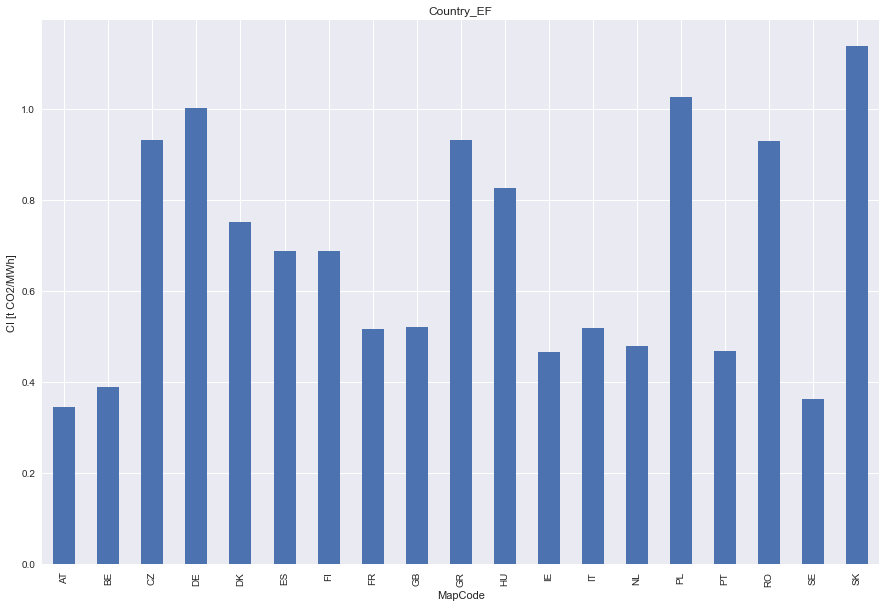

In [50]:
plt.figure()

generation_unit_info_EF_country.groupby(['MapCode']).mean().Country_EF.plot(kind='bar', subplots=True, ylabel='CI [t CO2/MWh]')

plt.grid(True)

#### Save point

In [51]:
generation_unit_info_EF_country.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

# Validation of calculated emission factors

In this section we checking if the underlying power production that we have used for EF calculation represent the country production. By comparing the used power plant production with the production per production type (from ENTSO-E) of each country, we can get an idea how trustful is our resulting EF.

#### Load ENTSO-E generation per type

In [52]:
#entsoe_gen_type = load_timeseries_ENTSOE(input_directory_path, 'time_series_60min_multiindex.csv')
entsoe_gen_type = pd.read_csv(input_directory_path+'/entsoe_gen_type_hourly_table.csv', index_col=[0], header=[0, 1], parse_dates=True).dropna(how="all", axis=0)

Show the head of the data (the data is using a multi index for the columns)

In [53]:
entsoe_gen_type.head()

region                         AT                                       \
variable                  biomass   gas hard_coal   hydro other_fossil   
utc_timestamp                                                            
2018-01-01 00:00:00+00:00   316.0  71.0     150.0  3345.0        122.0   
2018-01-01 01:00:00+00:00   316.0  70.0     149.0  3275.0        122.0   
2018-01-01 02:00:00+00:00   316.0  69.0     149.0  3167.0        122.0   
2018-01-01 03:00:00+00:00   316.0  72.0     149.0  3160.0        122.0   
2018-01-01 04:00:00+00:00   316.0  75.0     149.0  3330.0        122.0   

region                                                            BE           \
variable                  other_renewable solar wind_onshore biomass      gas   
utc_timestamp                                                                   
2018-01-01 00:00:00+00:00             0.0   0.0        832.0  232.46  1499.90   
2018-01-01 01:00:00+00:00             0.0   0.0        926.0  153.58  1565.88   
2018-01-01 02:00:00+00:00             0.0   0.0        692.0  133.70  1552.23   
2018-01-01 03:00:00+00:00             0.0   0.0        453.0  131.38  1515.33   
2018-01-01 04:00:00+00:00             0.0   0.0        321.0  131.26  1529.68   

region                     ...           SI      SK                           \
variable                   ... wind_onshore biomass    gas hard_coal   hydro   
utc_timestamp              ...                                                 
2018-01-01 00:00:00+00:00  ...         0.70    28.2  175.6      48.1  455.93   
2018-01-01 01:00:00+00:00  ...         0.61    28.1  172.9      48.0  461.95   
2018-01-01 02:00:00+00:00  ...         0.57    28.1  162.1      46.7  513.39   
2018-01-01 03:00:00+00:00  ...         0.62    29.7  140.3      45.3  587.83   
2018-01-01 04:00:00+00:00  ...         0.56    29.5  143.5      46.4  562.89   

region                                                                        
variable                  lignite nuclear other_fossil other_renewable solar  
utc_timestamp                                                                 
2018-01-01 00:00:00+00:00   179.5  1819.3        478.8            41.4   0.0  
2018-01-01 01:00:00+00:00   177.9  1816.7        475.8            41.0   0.0  
2018-01-01 02:00:00+00:00   174.7  1808.7        469.5            40.8   0.0  
2018-01-01 03:00:00+00:00   168.5  1803.6        455.6            39.4   0.0  
2018-01-01 04:00:00+00:00   170.6  1809.1        461.5            40.4   0.0  

[5 rows x 369 columns]

In [54]:
entsoe_gen_type['SE']

variable,hydro,nuclear,other_fossil,wind_onshore
utc_timestamp,,,,
2018-01-01 00:00:00+00:00,4407.0,8542.0,1135.0,2199.0
2018-01-01 01:00:00+00:00,4291.0,8540.0,1142.0,2253.0
2018-01-01 02:00:00+00:00,4259.0,8541.0,1056.0,2224.0
2018-01-01 03:00:00+00:00,4242.0,8542.0,1053.0,2154.0
2018-01-01 04:00:00+00:00,4376.0,8540.0,1053.0,2183.0
...,...,...,...,...
2018-12-31 19:00:00+00:00,5999.0,8207.0,1773.0,5556.0
2018-12-31 20:00:00+00:00,4742.0,8209.0,1707.0,5591.0
2018-12-31 21:00:00+00:00,3930.0,8210.0,1678.0,5576.0


#### Filter the data
- countries
- technologies

that are covert from our method

In [55]:
#country filter
entsoe_gen_type_pp = entsoe_gen_type[generation_unit_info_validated.EUTL_countrycode.unique()]
# take the sum of the generation
entsoe_gen_type_pp = entsoe_gen_type_pp.sum()

Reset the multiindex from pandas

In [56]:
entsoe_gen_type_pp = entsoe_gen_type_pp.reset_index()

Rename columns

In [57]:
entsoe_gen_type_pp = entsoe_gen_type_pp.rename(columns={0:'generation_per_type_2018_ENTSO-E','region':'EUTL_countrycode','variable':'ProductionTypeName'})

#### Production for each technology form power plant generation

In [58]:
Powerplants_gen_type_year = pd.DataFrame(generation_unit_info_validated.groupby(['EUTL_countrycode','ProductionTypeName']).sum()['generation_2018'])

Reset the multiindex from pandas and drop not used columns

In [59]:
Powerplants_gen_type_year = Powerplants_gen_type_year.reset_index()
Powerplants_gen_type_year = Powerplants_gen_type_year.rename(columns={'generation_2018':'verified_generation_per_unit_2018_ENTSO-E'})

#### Merge power plant generation and ENTSO-E per type

In [60]:
gen_data_comparison = entsoe_gen_type_pp.merge(Powerplants_gen_type_year, on=['EUTL_countrycode','ProductionTypeName'])

In [61]:
gen_data_comparison['missing_generation'] = gen_data_comparison['generation_per_type_2018_ENTSO-E'] - gen_data_comparison['verified_generation_per_unit_2018_ENTSO-E']

In [62]:
gen_data_comparison['covered_generation'] = round((100 / gen_data_comparison['generation_per_type_2018_ENTSO-E']) * gen_data_comparison['verified_generation_per_unit_2018_ENTSO-E'])

In [63]:
gen_data_comparison.head(10)

,EUTL_countrycode,ProductionTypeName,generation_per_type_2018_ENTSO-E,verified_generation_per_unit_2018_ENTSO-E,missing_generation,covered_generation
0,AT,gas,8.168009e+06,6.660371e+06,1.507638e+06,82.0
1,AT,hard_coal,1.422450e+06,6.938571e+05,7.285929e+05,49.0
2,DK,gas,2.843756e+06,2.734431e+05,2.570312e+06,10.0
3,DK,hard_coal,6.426351e+06,4.792089e+06,1.634262e+06,75.0
4,BE,gas,2.230368e+07,1.421671e+07,8.086968e+06,64.0
5,DE,gas,4.295907e+07,1.484443e+07,2.811464e+07,35.0
6,DE,hard_coal,7.154638e+07,6.179260e+07,9.753775e+06,86.0
7,DE,lignite,1.283613e+08,1.292305e+08,-8.691585e+05,101.0
8,DE,other_fossil,1.003786e+07,3.303138e+06,6.734727e+06,33.0
9,FI,hard_coal,5.971642e+06,4.093411e+06,1.878231e+06,69.0


#### Plot covered generation per country and generation type

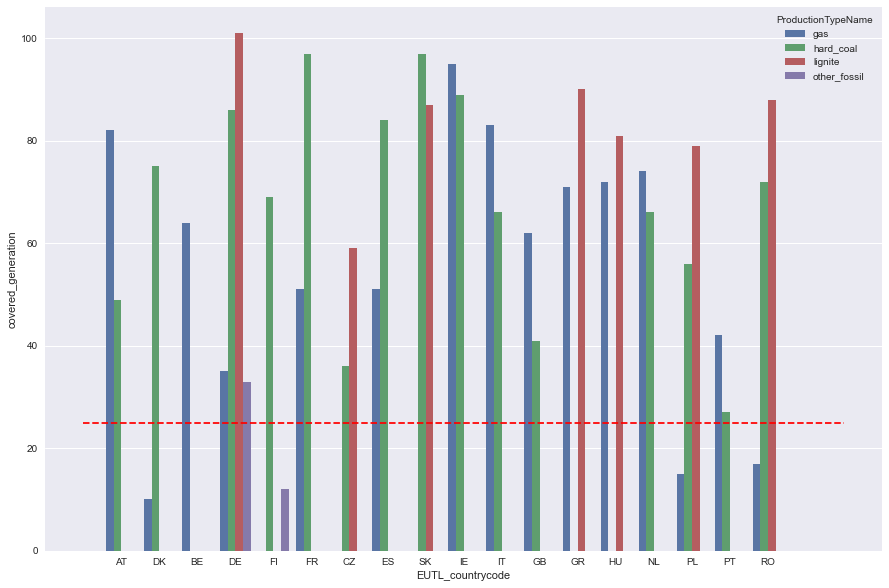

In [64]:
ax = sns.barplot(x="EUTL_countrycode", y="covered_generation", hue="ProductionTypeName", data=gen_data_comparison)
ax.plot([-1, 19], [25, 25], 'r--')

#### Mean coverage per country

In [65]:
gen_data_comparison.groupby(['EUTL_countrycode']).mean()['covered_generation']

EUTL_countrycode
AT    65.50
BE    64.00
CZ    47.50
DE    63.75
DK    42.50
ES    67.50
FI    40.50
FR    74.00
GB    51.50
GR    80.50
HU    76.50
IE    92.00
IT    74.50
NL    70.00
PL    50.00
PT    34.50
RO    59.00
SK    92.00
Name: covered_generation, dtype: float64

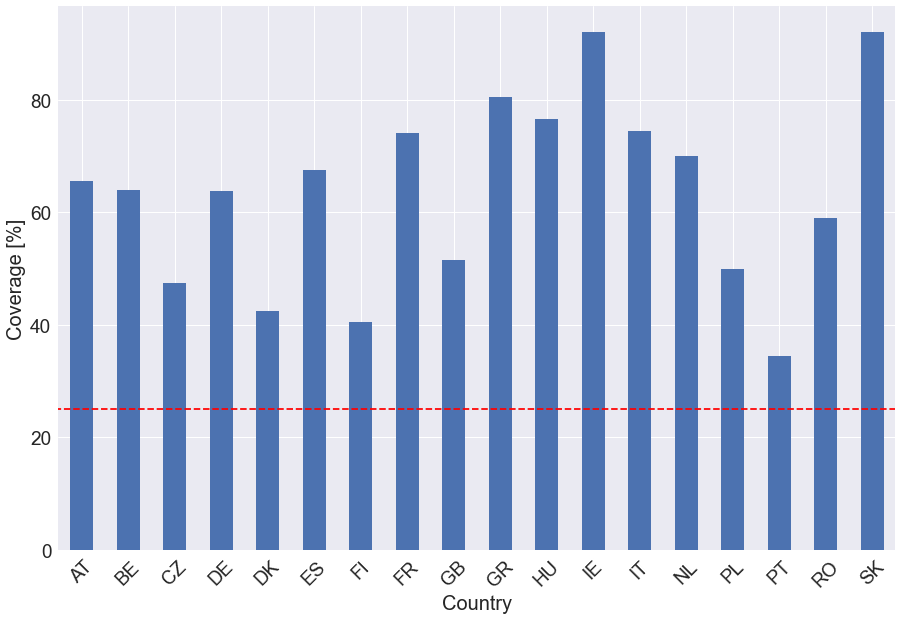

In [66]:
fig, ax = plt.subplots(1, 1)

ax = gen_data_comparison.groupby(['EUTL_countrycode']).mean()['covered_generation'].plot(kind='bar', ylabel='Coverage [%]')

ax.plot([-10, 100], [25, 25], 'r--')

ax.set_xlabel("Country" , fontsize=20)
ax.set_ylabel("Coverage [%]", fontsize=20)

ax.tick_params(axis='y',labelsize=19)
ax.tick_params(axis='x',labelsize=19)


ax.tick_params(axis='x', rotation=45)

In [67]:
fig.savefig(os.path.join(output_directory_path + '/_mean_coverage_of_elec_production_per_country.png'))

Mean coverage over all countries

In [68]:
gen_data_comparison.covered_generation.mean()

63.17948717948718

## Validation threshold for EF per technology and country

Take only the countries and technologies where at least 30 % of the generation is connected to CO2 emissions.

In [69]:
# add identifier
gen_data_comparison['Verified_EF'] = (round(gen_data_comparison['covered_generation']) > 25)

In [70]:
# set new index
gen_data_comparison = gen_data_comparison.set_index(['EUTL_countrycode','ProductionTypeName'])

In [71]:
# take the calculated EF from 7.3 and reset the used index
EF_per_tech_country = EF_per_tech_country.reset_index().rename(columns={0:'EF','EUTL_countrycode':'MapCode'}).set_index(['MapCode','ProductionTypeName'])

In [72]:
# Transfer the verification of EF too the result
EF_per_tech_country['Verified_EF'] = gen_data_comparison['Verified_EF']

In [73]:
EF_per_tech_country['EF_round_in_kwh'] = (EF_per_tech_country.EF * 1000).round(2)

In [74]:
EF_per_tech_country

EF Verified_EF  EF_round_in_kwh
MapCode ProductionTypeName                                       
AT      gas                 0.288711        True           288.71
        hard_coal           0.884070        True           884.07
BE      gas                 0.389641        True           389.64
CZ      hard_coal           0.985546        True           985.55
        lignite             0.928296        True           928.30
DE      gas                 0.334091        True           334.09
        hard_coal           0.871051        True           871.05
        lignite             1.125560        True          1125.56
        other_fossil        1.619695        True          1619.69
DK      gas                 0.329783       False           329.78
        hard_coal           0.775840        True           775.84
ES      gas                 0.386506        True           386.51
        hard_coal           0.975777        True           975.78
FI      hard_coal           0.674454        True           674.45
        other_fossil        0.759814       False           759.81
FR      gas                 0.396985        True           396.98
        hard_coal           0.834945        True           834.94
GB      gas                 0.467992        True           467.99
        hard_coal           1.103223        True          1103.22
GR      gas                 0.332135        True           332.13
        lignite             1.401712        True          1401.71
HU      gas                 0.371916        True           371.92
        lignite             1.355619        True          1355.62
IE      gas                 0.347416        True           347.42
        hard_coal           1.032204        True          1032.20
IT      gas                 0.387735        True           387.74
        hard_coal           0.997673        True           997.67
NL      gas                 0.353883        True           353.88
        hard_coal           0.948562        True           948.56
PL      gas                 0.370311       False           370.31
        hard_coal           0.942409        True           942.41
        lignite             1.158647        True          1158.65
PT      gas                 0.430328        True           430.33
        hard_coal           0.546439        True           546.44
RO      gas                 0.315028       False           315.03
        hard_coal           1.157439        True          1157.44
        lignite             1.000763        True          1000.76
SE      gas                 0.361805         NaN           361.80
SK      hard_coal           0.903090        True           903.09
        lignite             1.295547        True          1295.55

In [75]:
# hoe many false are in the EF dataset
(EF_per_tech_country.Verified_EF == False).sum()

4

# Export final EF to csv

In [76]:
EF_per_tech_country.to_csv(processed_directory_path + '/EF_bottom_up_methode.csv')
EF_per_tech_country.to_csv(output_directory_path + '/EF_bottom_up_methode.csv')